<a href="https://colab.research.google.com/github/ericycheng8/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture4/In_Class_Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: read csv

import pandas as pd

# Assuming your CSV file is named 'data.csv' and is in the current working directory
df = pd.read_csv('/content/Wavetronix.csv')

# Print the first 5 rows of the DataFrame
print(df.head())


   day            Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1  7/10/2022 0:00            NaN            NaN            3.0   
1    1  7/10/2022 0:01           10.0           62.0            2.0   
2    1  7/10/2022 0:02            5.0           63.6            4.0   
3    1  7/10/2022 0:03           11.0           58.2            9.0   
4    1  7/10/2022 0:04           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


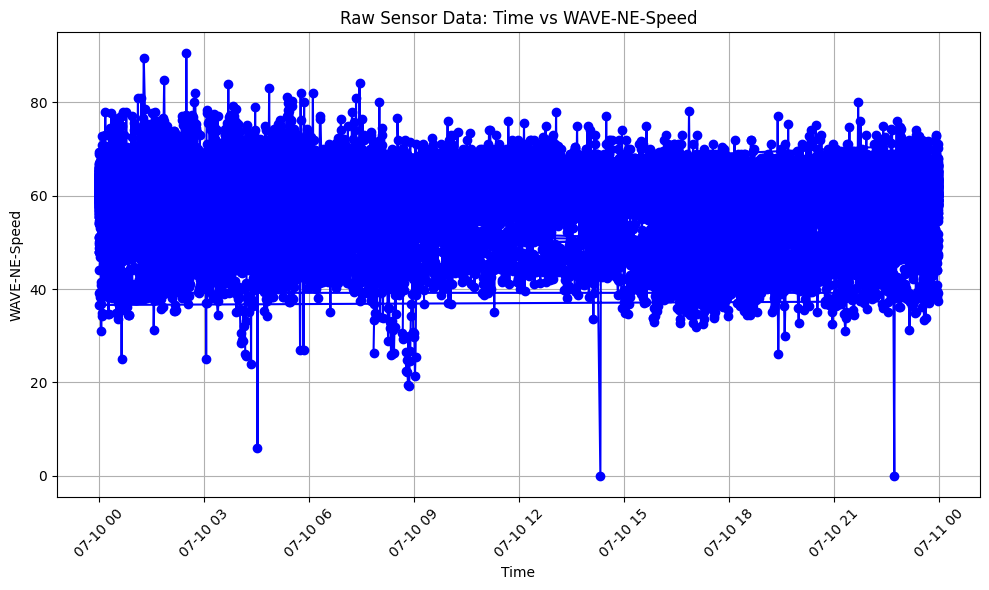

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Wavetronix.csv')
df.head()
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['WAVE-NE-Speed'], color='blue', marker='o', linestyle='-', label='WAVE-SW-Speed')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Raw Sensor Data: Time vs WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

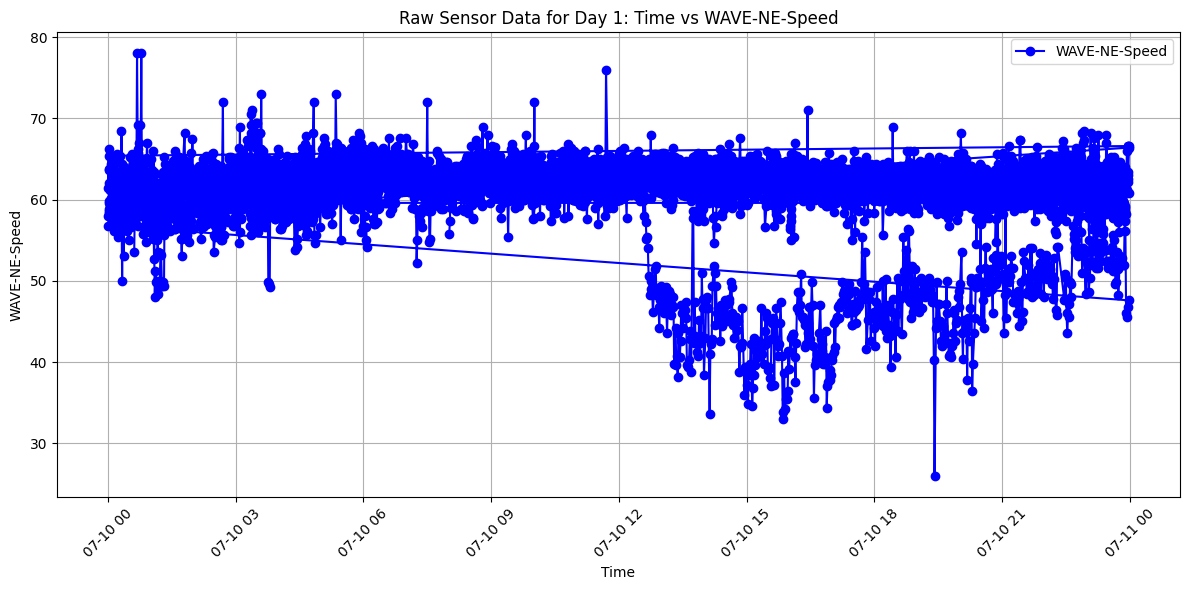

In [ ]:
df = pd.read_csv('/content/Wavetronix.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')
df.head()
df_day1 = df[df['day'] == 1]
df_day1.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_day1['Time'], df_day1['WAVE-NE-Speed'], color='blue', marker='o', linestyle='-', label='WAVE-NE-Speed')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Raw Sensor Data for Day 1: Time vs WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
# Replace 'your_file.csv' with the actual file name
df = pd.read_csv('/content/Wavetronix.csv')

# Convert 'Time' column to datetime if needed
# df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')

threshold = 20

# Count the number of minutes where WAVE-NE-Speed drops below the threshold
minutes_below_threshold = df[df['WAVE-NE-Speed'] < threshold].shape[0]

# Print the result
print(f"Number of minutes where WAVE-NE-Speed drops below {threshold} units: {minutes_below_threshold}")

Number of minutes where WAVE-NE-Speed drops below 20 units: 5


Total Time where WAVE-NE-Speed < 20 units: 1092.00 minutes


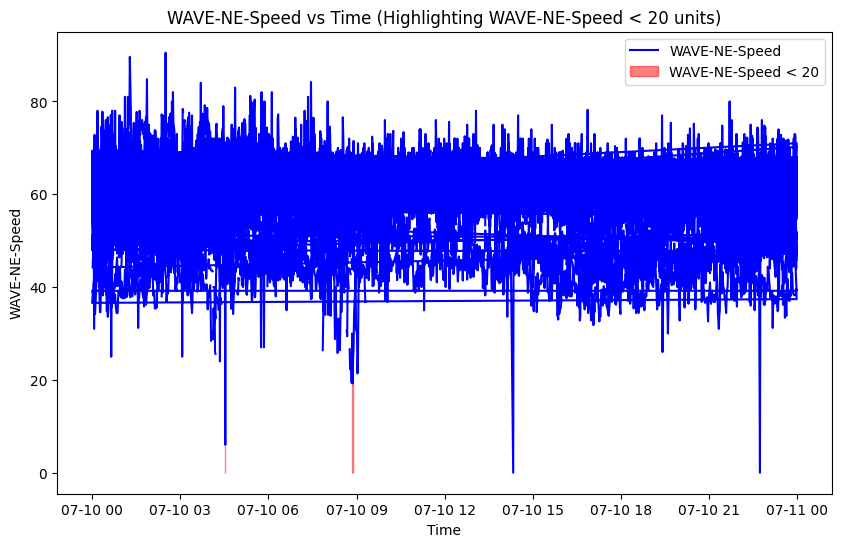

In [ ]:
# Step 2: Load the CSV file
data = pd.read_csv('/content/Wavetronix.csv')

# Step 3: Define the speed threshold
speed_threshold = 20

# Step 4: Create a mask for speed below the threshold
below_threshold = data['WAVE-NE-Speed'] < speed_threshold

# Step 5: Calculate the total time below the threshold (assuming time is in seconds)
# Convert 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M')
# Calculate the time difference between consecutive timestamps
time_diffs = data[below_threshold]['Time'].diff()
# Sum the time differences and convert to minutes
total_time_below_threshold = time_diffs.sum().total_seconds() / 60
print(f'Total Time where WAVE-NE-Speed < {speed_threshold} units: {total_time_below_threshold:.2f} minutes')

# Step 6: Plot the data and highlight the regions where speed is below the threshold
plt.figure(figsize=(10, 6))

# Plot the speed vs. time
plt.plot(data['Time'], data['WAVE-NE-Speed'], label='WAVE-NE-Speed', color='blue')

# Highlight the regions where speed is below the threshold
plt.fill_between(data['Time'], data['WAVE-NE-Speed'], where=below_threshold, color='red', alpha=0.5, label=f'WAVE-NE-Speed < {speed_threshold}')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title(f'WAVE-NE-Speed vs Time (Highlighting WAVE-NE-Speed < {speed_threshold} units)')
plt.legend()

# Show the plot
plt.show()

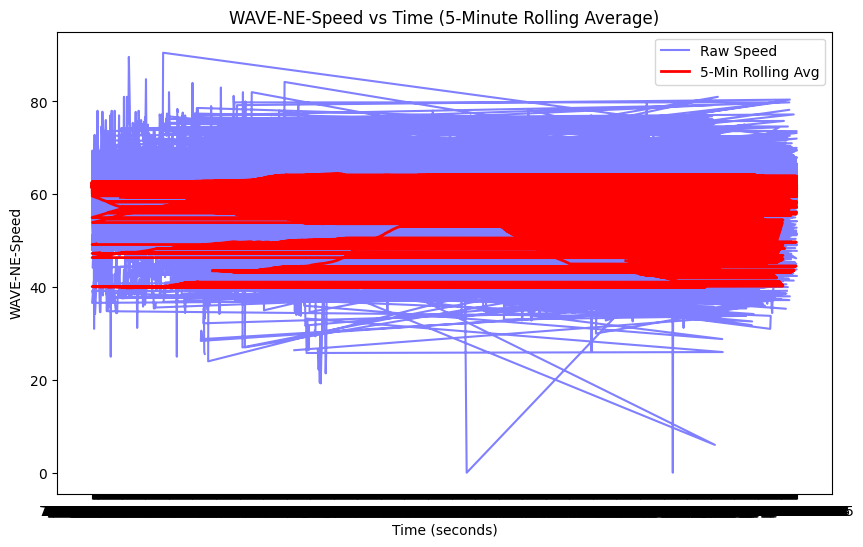

In [ ]:
# Step 2: Load the CSV file into a DataFrame
data = pd.read_csv('/content/Wavetronix.csv')

# Step 3: Define the window size (5 minutes = 300 seconds if time is in seconds)
window_size = 300

# Step 4: Compute the 5-minute rolling average for speed
data['speed_rolling_avg'] = data['WAVE-NE-Speed'].rolling(window=window_size).mean()

# Step 5: Plot the original and smoothed speed data
plt.figure(figsize=(10, 6))

# Plot the original speed data
plt.plot(data['Time'], data['WAVE-NE-Speed'], label='Raw Speed', color='blue', alpha=0.5)

# Plot the 5-minute rolling average
plt.plot(data['Time'], data['speed_rolling_avg'], label='5-Min Rolling Avg', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('WAVE-NE-Speed')
plt.title('WAVE-NE-Speed vs Time (5-Minute Rolling Average)')
plt.legend()

# Show the plot
plt.show()

Missing Values Summary:
 day                 0
Time                0
WAVE-NE-Count    4724
WAVE-NE-Speed    4724
WAVE-SW-Count    4435
WAVE-SW-Speed    4435
Month               0
Year                0
dtype: int64
Missing values after interpolation:
 day                 0
Time                0
WAVE-NE-Count    4724
WAVE-NE-Speed       1
WAVE-SW-Count    4435
WAVE-SW-Speed    4435
Month               0
Year                0
dtype: int64
Number of duplicate rows: 0
Number of duplicate rows after cleaning: 0
Data size after removing unreasonable speed values: (223047, 8)


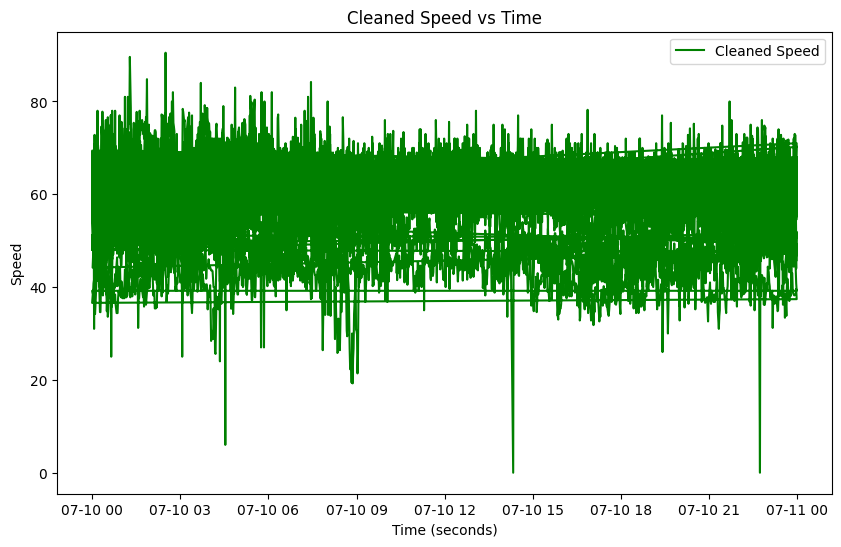

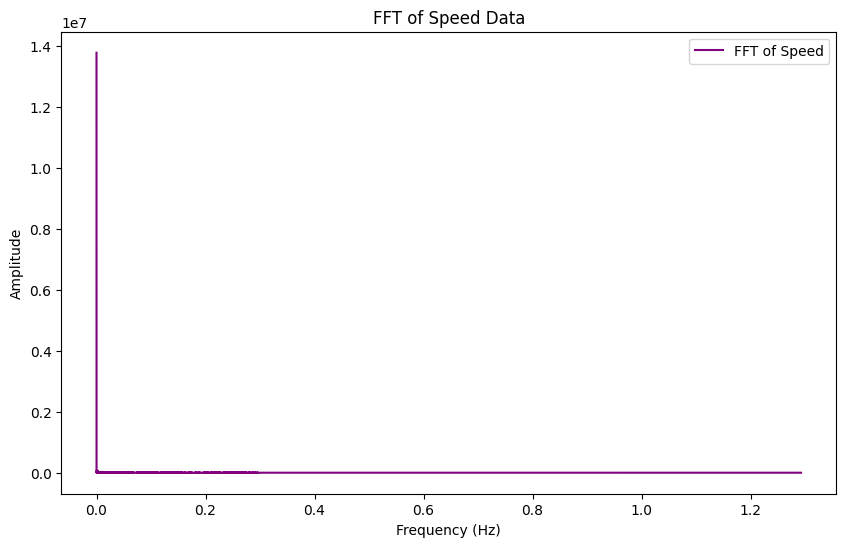

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Upload and Load the Data
data = pd.read_csv('/content/Wavetronix.csv')

# Step 2: Check for Missing Data
missing_values = data.isnull().sum()
print("Missing Values Summary:\n", missing_values)

# Step 3: Fill Missing Values Using Interpolation
data['WAVE-NE-Speed'] = data['WAVE-NE-Speed'].interpolate() # Changed 'speed' to 'WAVE-NE-Speed
print("Missing values after interpolation:\n", data.isnull().sum())

# Step 4: Remove Duplicate Rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data_cleaned = data.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {data_cleaned.duplicated().sum()}")

# Step 5: Remove Speed Values Outside a Reasonable Range
min_speed = 0
max_speed = 120
data_cleaned = data_cleaned[(data_cleaned['WAVE-NE-Speed'] >= min_speed) & (data_cleaned['WAVE-NE-Speed'] <= max_speed)] # Changed 'speed' to 'WAVE-NE-Speed
print(f"Data size after removing unreasonable speed values: {data_cleaned.shape}")

# Step 6: Plot the Cleaned Data
# Convert 'Time' column to datetime
# This ensures that time differences can be calculated correctly
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%m/%d/%Y %H:%M')

plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Time'], data_cleaned['WAVE-NE-Speed'], label='Cleaned Speed', color='green') # Changed 'time' to 'Time' and 'speed' to 'WAVE-NE-Speed'
plt.xlabel('Time (seconds)')
plt.ylabel('Speed')
plt.title('Cleaned Speed vs Time')
plt.legend()
plt.show()

# Step 7: Apply the FFT to the Cleaned Data
speed_fft = np.fft.fft(data_cleaned['WAVE-NE-Speed']) # Changed 'speed' to 'WAVE-NE-Speed
n = len(speed_fft)

# Calculate time differences using the converted datetime objects
frequencies = np.fft.fftfreq(n, d=(data_cleaned['Time'].diff().dt.total_seconds().mean())) # Changed 'time' to 'Time

# Plot the FFT (Frequency Domain)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n//2], np.abs(speed_fft)[:n//2], label='FFT of Speed', color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Speed Data')
plt.legend()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.7 MB/s eta 0:00:00


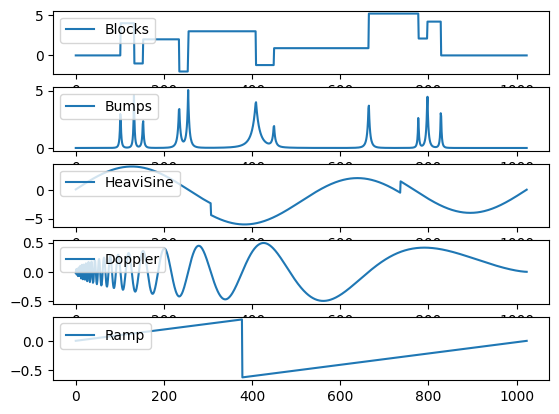

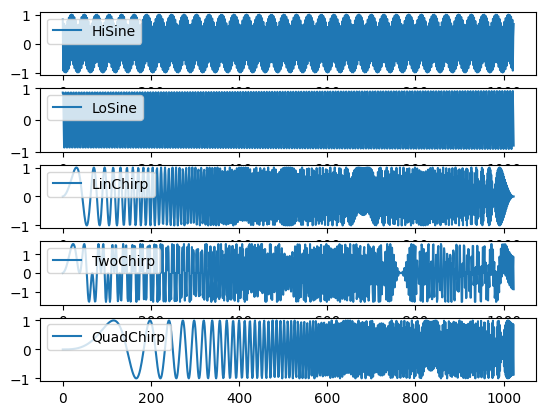

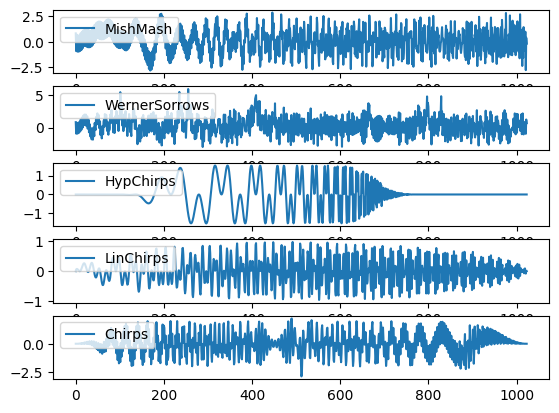

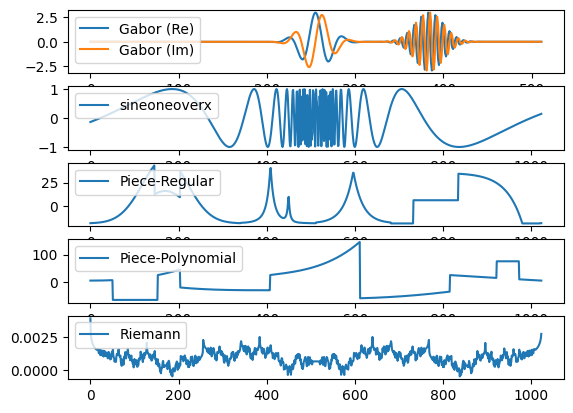

In [ ]:
#!/usr/bin/env python

"""Plot the  set of 1D demo signals available in `pywt.data.demo_signal`."""

import matplotlib.pyplot as plt
import numpy as np
!pip install pywavelets
import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

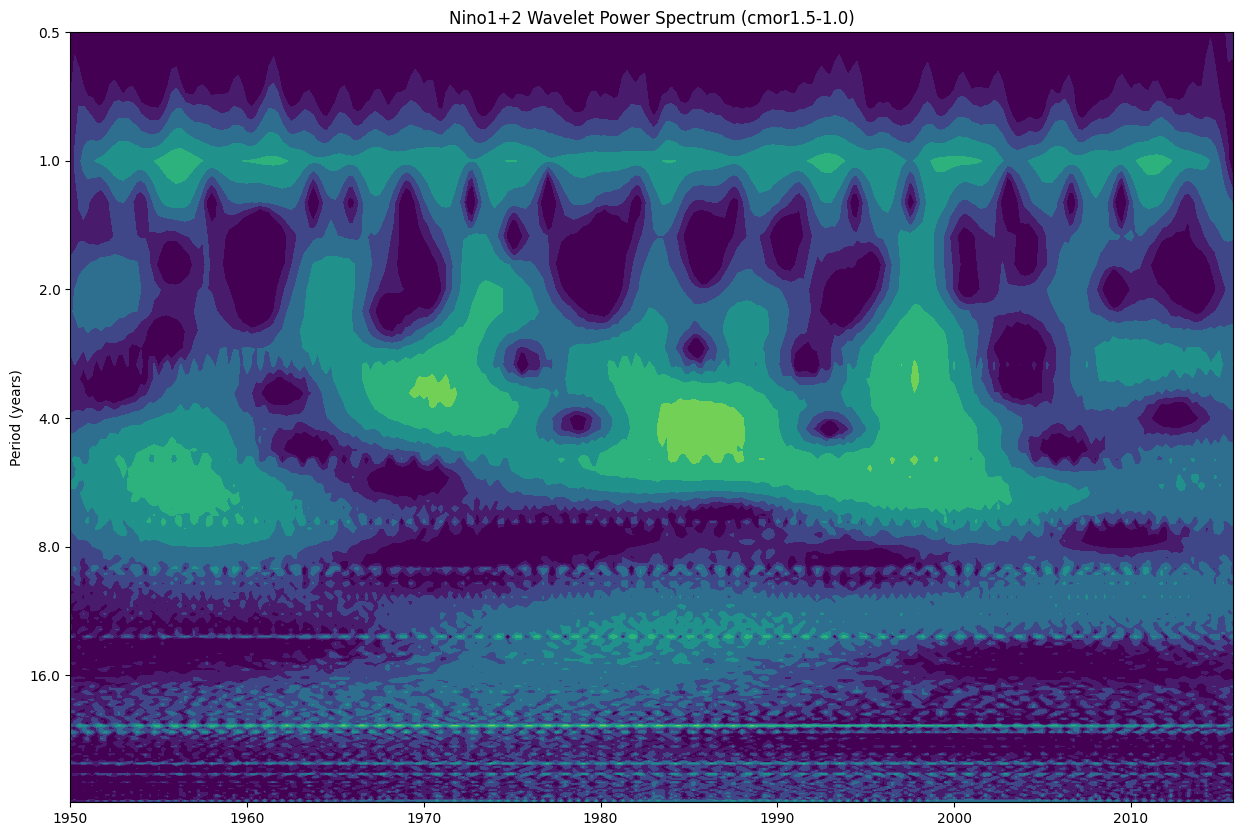

In [ ]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np
!pip install pywavelets
import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title(f'Nino1+2 Wavelet Power Spectrum ({wavelet})')
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

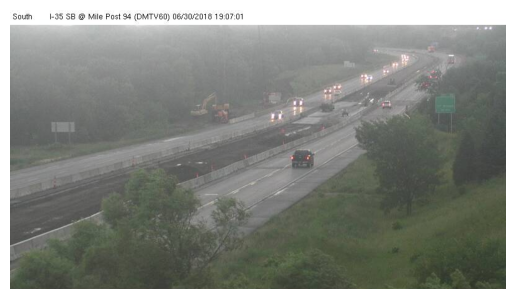

(450, 800, 3)


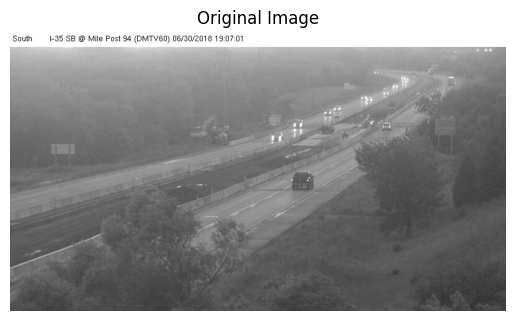

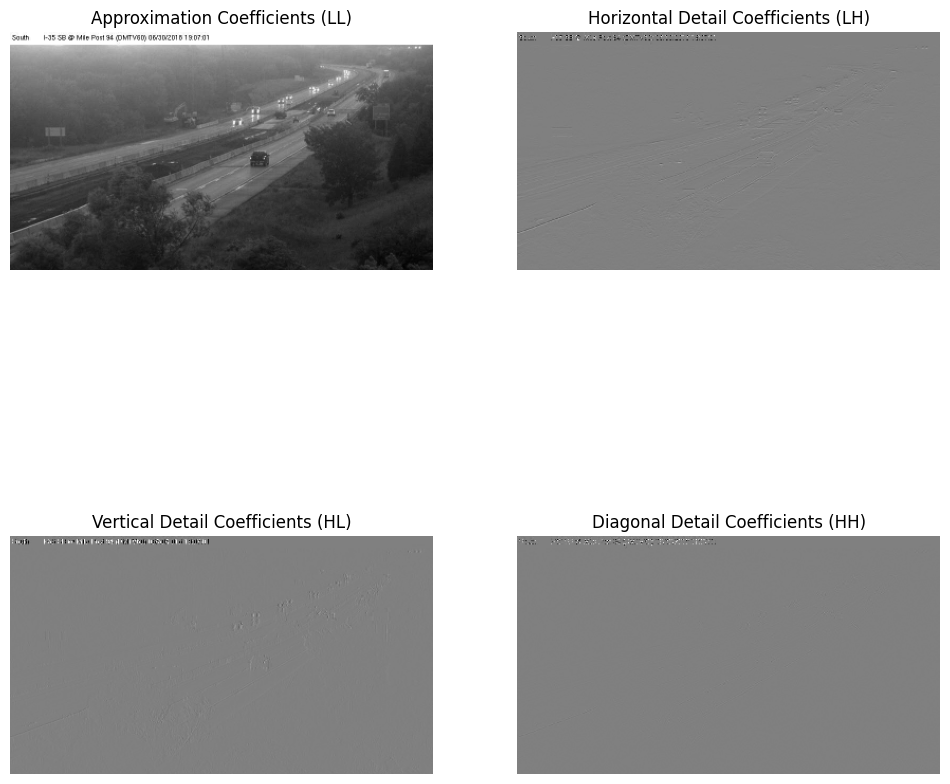

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open and display the image
img = Image.open('/content/2018-06-30-19-05.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Convert the image to a NumPy array
img_array = np.array(img)

# Display the shape of the array to confirm
print(img_array.shape)

# Step 3: Upload and Load the Image
image = img

# Step 4: Convert to Grayscale and to a NumPy Array
image_gray = image.convert('L')
image_array = np.array(image_gray)

# Step 5: Display the Original Image
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 6: Perform 2D Discrete Wavelet Transform (DWT) using Haar wavelet
coeffs2 = pywt.dwt2(image_array, 'haar')
LL, (LH, HL, HH) = coeffs2

# Step 7: Plot the Decomposition (LL, LH, HL, HH)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Approximation Coefficients (LL)
axs[0, 0].imshow(LL, cmap='gray')
axs[0, 0].set_title('Approximation Coefficients (LL)')
axs[0, 0].axis('off')

# Horizontal Detail Coefficients (LH)
axs[0, 1].imshow(LH, cmap='gray')
axs[0, 1].set_title('Horizontal Detail Coefficients (LH)')
axs[0, 1].axis('off')

# Vertical Detail Coefficients (HL)
axs[1, 0].imshow(HL, cmap='gray')
axs[1, 0].set_title('Vertical Detail Coefficients (HL)')
axs[1, 0].axis('off')

# Diagonal Detail Coefficients (HH)
axs[1, 1].imshow(HH, cmap='gray')
axs[1, 1].set_title('Diagonal Detail Coefficients (HH)')
axs[1, 1].axis('off')

# Show the plot
plt.show()